In [1]:
import pandas as pd 
import numpy as np
print(np.__version__)

1.24.3


### EDA

In [2]:
rdata = pd.read_csv("/Users/houbowang/Desktop/sta 221/bank+marketing/bank-additional/bank-additional-full.csv", sep=";")
rdata.head()
#data is raw data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
rdata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


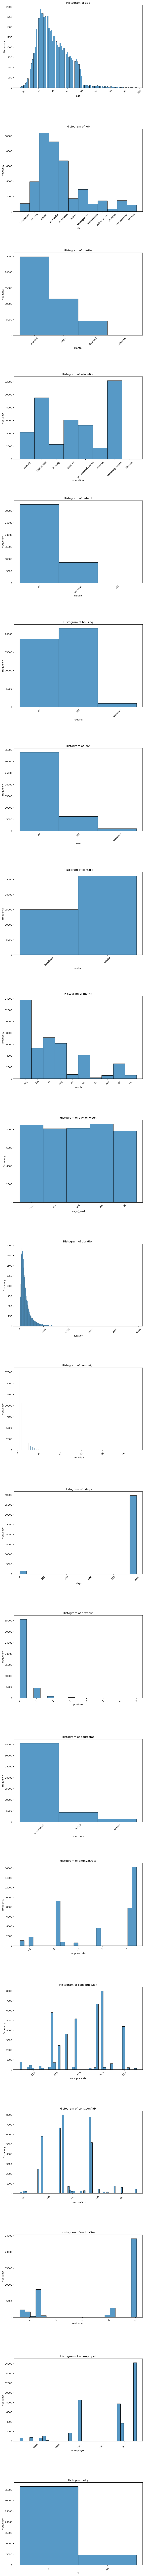

In [5]:
fig, axes = plt.subplots(nrows=21, ncols=1, figsize=(10, 200), subplot_kw=dict(aspect='auto'))
fig.subplots_adjust(hspace=0.5)

for i, variable in enumerate(rdata.columns):
    sns.histplot(rdata[variable], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')    
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

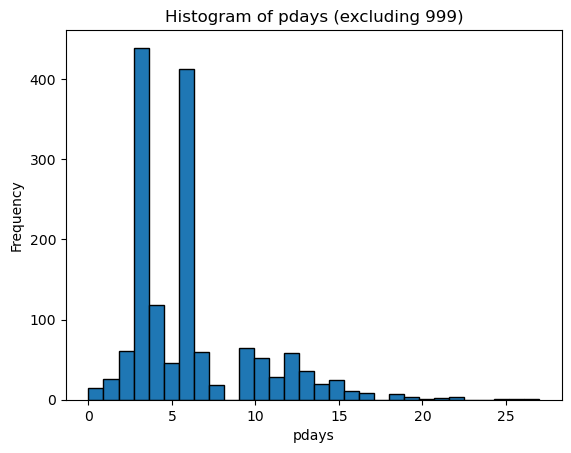

In [6]:
filtered_pdays = rdata['pdays'][rdata['pdays'] != 999]

# Plot the histogram
plt.hist(filtered_pdays, bins=30, edgecolor='black')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('Histogram of pdays (excluding 999)')
plt.show()

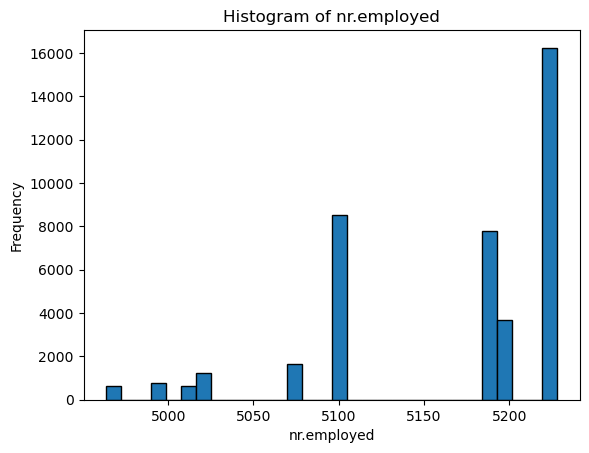

In [7]:
nemp = rdata['nr.employed']

# Plot the histogram in case the pdf is not clear
plt.hist(nemp, bins=30, edgecolor='black')
plt.xlabel('nr.employed')
plt.ylabel('Frequency')
plt.title('Histogram of nr.employed')
plt.show()

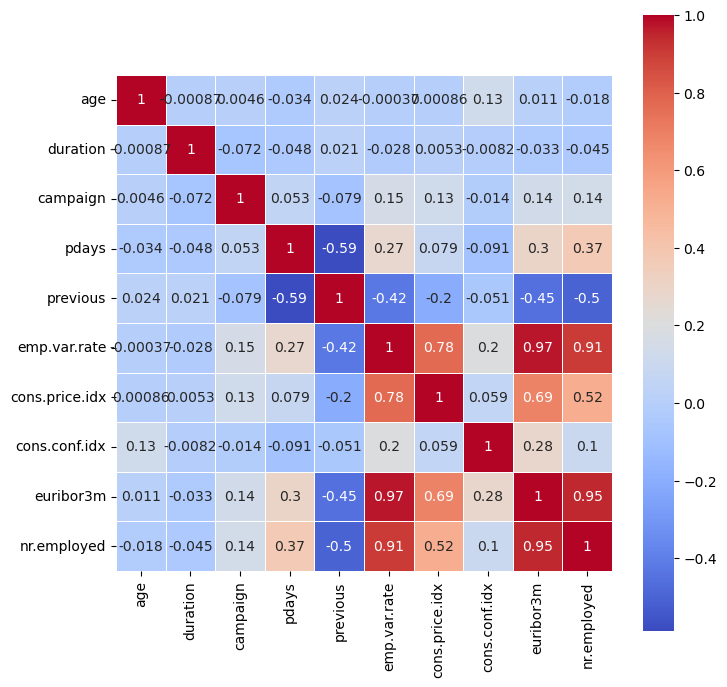

In [8]:
#corr matrix
numeric_data = rdata.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, square=True)
plt.show()

### Data Preprocessing

In [9]:
rdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
rdata.replace({'unknown': np.nan}, inplace=True)
#change unknown to missing values

In [11]:
rdata.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<Axes: >

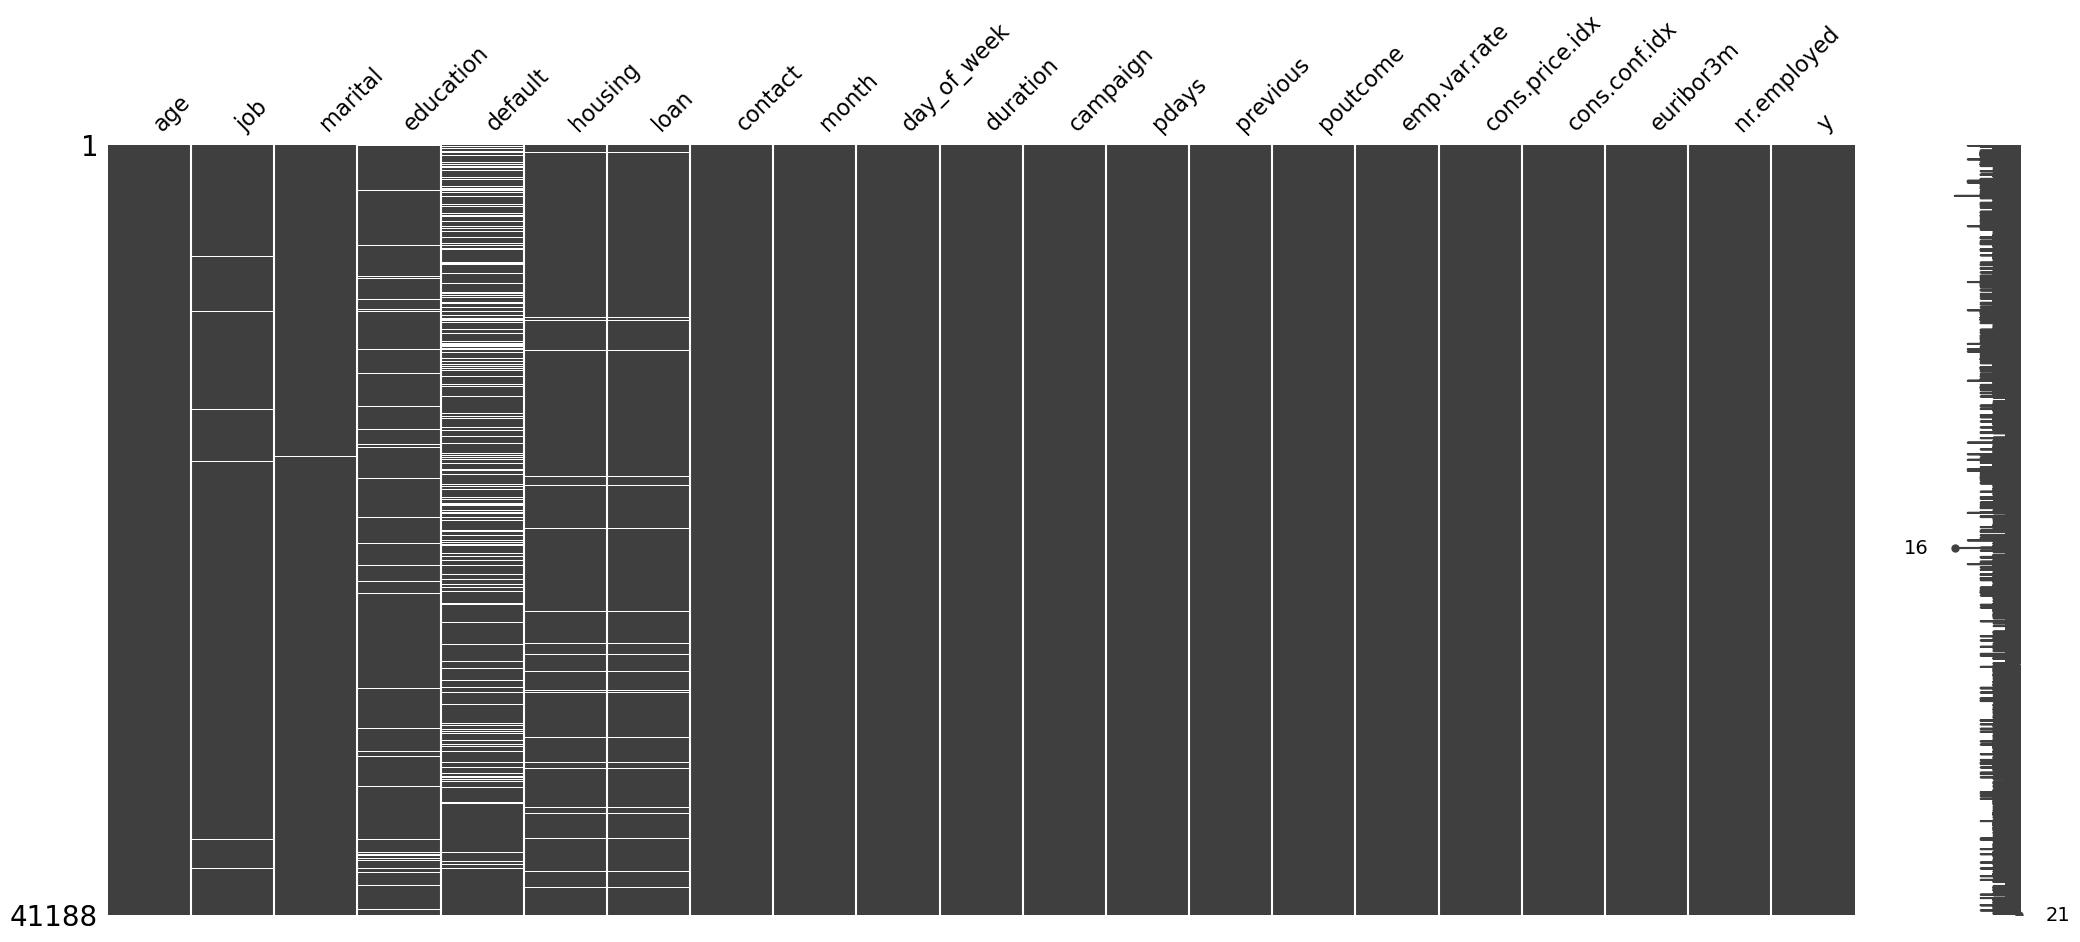

In [12]:
import missingno as msno 
msno.matrix(rdata)

In [13]:
data_cleaned = rdata.dropna()
data_cleaned.isnull().sum()
#delete missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<Axes: >

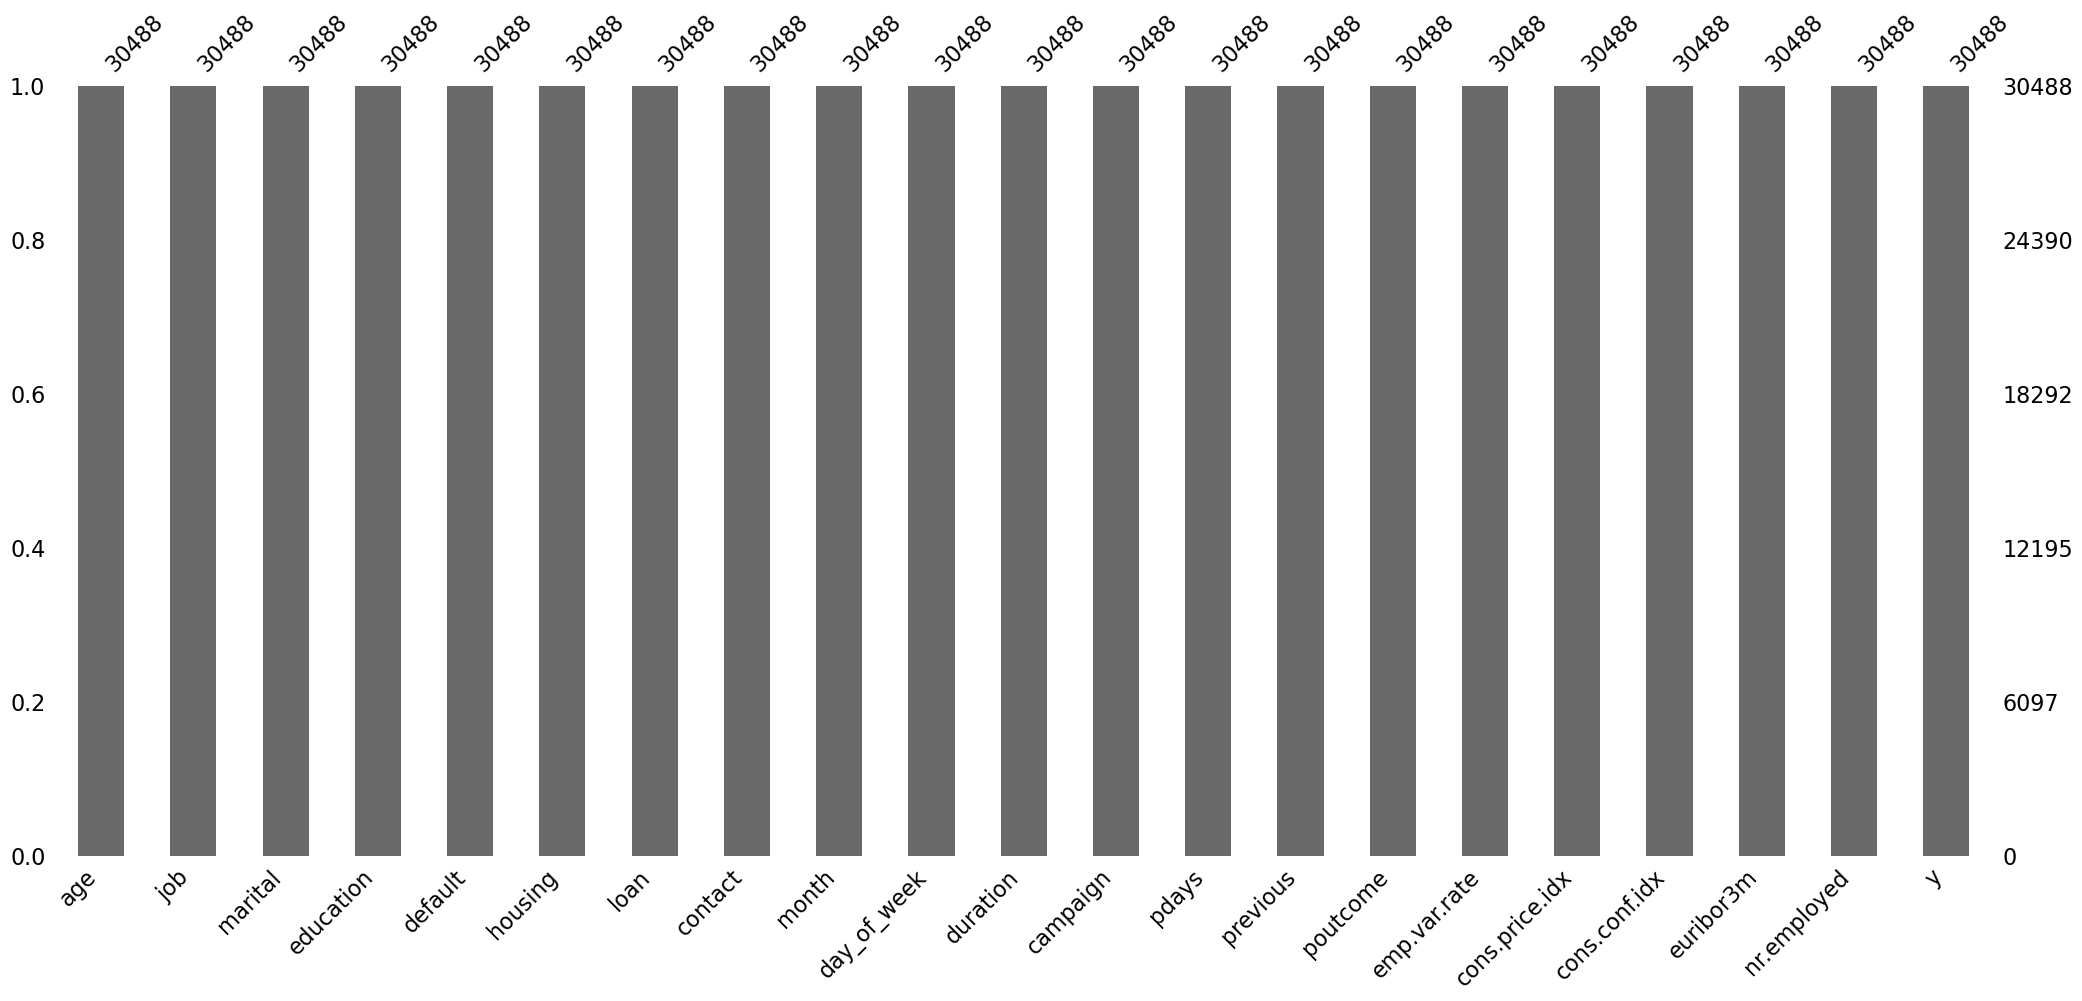

In [14]:
msno.bar(data_cleaned) 

In [15]:
data = data_cleaned.drop_duplicates()
data.shape
#delete duplicate

(30478, 21)

In [16]:
data['y'].replace({'yes': 1, 'no': 0}, inplace=True)
data
#transform y to numerical

/var/folders/dv/xq3vbg2x22zfk35z4q64z0br0000gn/T/ipykernel_83986/1615810483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'].replace({'yes': 1, 'no': 0}, inplace=True)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [17]:
data_x = data.iloc[:, :-1]
data_x['first_contact'] = (data_x['pdays'] == 999).astype(int)
#add first_contact varaible for pdays 999 issue
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)
#split estimator x's and target y

Shape of X: (30478, 21)
Shape of Y: (30478,)


In [18]:
categorical_feats = data_x.columns[data_x.dtypes==object].tolist()
categorical_feats

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [19]:
data_encoded = pd.get_dummies(data_x, columns=categorical_feats)
print(data_encoded.dtypes==object)
#one-hot encoding 

age                              False
duration                         False
campaign                         False
pdays                            False
previous                         False
emp.var.rate                     False
cons.price.idx                   False
cons.conf.idx                    False
euribor3m                        False
nr.employed                      False
first_contact                    False
job_admin.                       False
job_blue-collar                  False
job_entrepreneur                 False
job_housemaid                    False
job_management                   False
job_retired                      False
job_self-employed                False
job_services                     False
job_student                      False
job_technician                   False
job_unemployed                   False
marital_divorced                 False
marital_married                  False
marital_single                   False
education_basic.4y       

data_encoded = pd.get_dummies(data_x, columns=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome'])
print(data_encoded.dtypes==object)
#one-hot encoding 

In [20]:
from sklearn.model_selection import train_test_split
random_seed = 7

X_temp, X_test, y_temp, y_test = train_test_split(data_encoded, data_y, test_size=0.2, random_state=random_seed)
X_train, X_cv, y_train, y_cv = train_test_split(X_temp, y_temp, test_size=0.2, random_state=random_seed)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (19505, 58)
X CV: (4877, 58)
X Test: (6096, 58)
Y Train: (19505,)
Y CV: (4877,)
Y Test: (6096,)


### Model1: Simple Logistic Regression

In [21]:
# with duration feature
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score with duration feature is: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score with duration feature is:  0.9237208049344399


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.feature_selection import RFE


In [23]:
#feature importance
model.fit(X_train, y_train)
coef_importance = pd.Series(model.coef_[0], index=X_train.columns)
selected_features_coef = coef_importance.abs().sort_values(ascending=False).index

print("\nFeature Importance based on Coefficients:")
print(selected_features_coef)


Feature Importance based on Coefficients:
Index(['month_may', 'cons.price.idx', 'emp.var.rate', 'euribor3m',
       'education_university.degree', 'job_blue-collar', 'month_mar',
       'contact_cellular', 'contact_telephone', 'poutcome_failure', 'previous',
       'poutcome_nonexistent', 'education_basic.9y', 'marital_single',
       'campaign', 'month_jul', 'month_oct', 'marital_married', 'month_aug',
       'month_jun', 'month_apr', 'job_admin.', 'job_retired', 'job_services',
       'day_of_week_fri', 'job_student', 'education_high.school',
       'job_technician', 'education_basic.6y', 'month_nov', 'loan_no',
       'cons.conf.idx', 'education_professional.course', 'day_of_week_thu',
       'loan_yes', 'education_basic.4y', 'day_of_week_wed', 'marital_divorced',
       'month_sep', 'job_unemployed', 'poutcome_success', 'housing_no',
       'job_entrepreneur', 'nr.employed', 'day_of_week_tue', 'duration',
       'housing_yes', 'day_of_week_mon', 'job_management', 'job_housemaid',


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
order_feat = coef_importance.abs().sort_values(ascending=False)
print(order_feat)


month_may                        0.504248
cons.price.idx                   0.383291
emp.var.rate                     0.369880
euribor3m                        0.264821
education_university.degree      0.193197
job_blue-collar                  0.173951
month_mar                        0.173412
contact_cellular                 0.144598
contact_telephone                0.140565
poutcome_failure                 0.136142
previous                         0.133482
poutcome_nonexistent             0.128916
education_basic.9y               0.114094
marital_single                   0.091284
campaign                         0.082811
month_jul                        0.077451
month_oct                        0.075444
marital_married                  0.072822
month_aug                        0.072377
month_jun                        0.068310
month_apr                        0.066965
job_admin.                       0.066418
job_retired                      0.066066
job_services                     0

In [25]:
print(coef_importance.abs().count())

58


In [26]:
print(coef_importance.sort_values(ascending=False))

cons.price.idx                   0.383291
education_university.degree      0.193197
month_mar                        0.173412
contact_cellular                 0.144598
poutcome_nonexistent             0.128916
marital_single                   0.091284
campaign                         0.082811
month_jul                        0.077451
month_oct                        0.075444
month_aug                        0.072377
month_jun                        0.068310
month_apr                        0.066965
job_admin.                       0.066418
job_retired                      0.066066
job_student                      0.047814
job_technician                   0.043610
loan_no                          0.034751
cons.conf.idx                    0.034080
education_professional.course    0.033796
day_of_week_thu                  0.031338
day_of_week_wed                  0.022197
month_sep                        0.013405
job_unemployed                   0.011710
poutcome_success                 0

In [27]:
# Removing duration feature 

# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (19505, 57)
The shape of the cv dataset:  (4877, 57)
The shape of the test dataset:  (6096, 57)


In [28]:
# without "duration" column

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column:  0.7780484822518409


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# without "duration" column and without class balancing
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)

print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred[:,1]))

AUC score without duration column and class balancing:  0.76658670913873


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model2: Penalized Logistic Regression (Ridge)

In [30]:
import os
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing

from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
alpha = [10 ** x for x in range(-5, 3)]
cv_auc_array=[]

for i in alpha:
    model=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

AUC for k =  1e-05 is 0.7630121610175543
AUC for k =  0.0001 is 0.7726509379864012
AUC for k =  0.001 is 0.7865942837731096
AUC for k =  0.01 is 0.7830596897704205
AUC for k =  0.1 is 0.7857818457299655
AUC for k =  1 is 0.7862511959223276
AUC for k =  10 is 0.77933344757069
AUC for k =  100 is 0.7786660609080518
0.001


In [32]:
#fit model with the best alpha
penal_log=LogisticRegression(penalty='l2',C=best_alpha,class_weight='balanced')
penal_log.fit(X_train,y_train)
calib_penal_log = CalibratedClassifierCV(penal_log, method="sigmoid")
calib_penal_log.fit(X_train, y_train)
    
predict_y = calib_penal_log.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_penal_log.predict_proba(X_cv)
print('With the best alpha = ', best_alpha, "the cv AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_penal_log.predict_proba(X_test)
print('With the best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

With the best alpha =  0.001 the train AUC is: 0.7889892239101208
With the best alpha =  0.001 the cv AUC is: 0.7865942837731096
With the best alpha =  0.001 the test AUC is: 0.7835674144892689


/Users/houbowang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model 3: Random Forest

In [33]:
#random forest

alpha=[10,50,100,200,500,1000]
cv_auc_array=[]

for i in alpha:
    model=RandomForestClassifier(n_estimators=i,random_state=7,n_jobs=-1)
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)

AUC for number of estimators =  10 is 0.7699141265764943
AUC for number of estimators =  50 is 0.7824689623865989
AUC for number of estimators =  100 is 0.7835656785886878
AUC for number of estimators =  200 is 0.7849269444588494
AUC for number of estimators =  500 is 0.7846851295278765
AUC for number of estimators =  1000 is 0.7839668245697499
200


In [34]:
RF=RandomForestClassifier(n_estimators=best_alpha,random_state=7,n_jobs=-1)
RF.fit(X_train,y_train)
calib_RF = CalibratedClassifierCV(RF, method="sigmoid")
calib_RF.fit(X_train, y_train)
    
predict_y = calib_RF.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_RF.predict_proba(X_cv)
print('With the best alpha = ', best_alpha, "the cv AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_RF.predict_proba(X_test)
print('With the best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

With the best alpha =  200 the train AUC is: 0.9996961672085332
With the best alpha =  200 the cv AUC is: 0.7849269444588494
With the best alpha =  200 the test AUC is: 0.7970885477081111


### Model 4: XGB

In [35]:
from xgboost import XGBClassifier
import xgboost as xgb

In [36]:
alpha=[10,50,100,200,500,1000]
cv_auc_array=[]

for i in alpha:
    model=XGBClassifier(n_estimators=i,random_state=7,n_jobs=-1)
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)

AUC for number of estimators =  10 is 0.8050860801029338
AUC for number of estimators =  50 is 0.8030647552953148
AUC for number of estimators =  100 is 0.7976869565740217
AUC for number of estimators =  200 is 0.7847912875978064
AUC for number of estimators =  500 is 0.7665576526628202
AUC for number of estimators =  1000 is 0.758218701406848
10


In [37]:
XGB=XGBClassifier(n_estimators=best_alpha,random_state=7,n_jobs=-1)
XGB.fit(X_train,y_train)
calib_XGB = CalibratedClassifierCV(XGB, method="sigmoid")
calib_XGB.fit(X_train, y_train)
    
predict_y = calib_XGB.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_XGB.predict_proba(X_cv)
print('With the best alpha = ', best_alpha, "the cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_XGB.predict_proba(X_test)
print('With the best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

With the best alpha =  10 the train AUC is: 0.8514790127820173
With the best alpha =  10 the cross validation AUC is: 0.8050860801029338
With the best alpha =  10 the test AUC is: 0.8135477857281544


### Model 5: kNN

In [38]:
print(X_cv.flags)
print(X_train.flags)
print(y_train.flags)

<Flags(allows_duplicate_labels=True)>
<Flags(allows_duplicate_labels=True)>
<Flags(allows_duplicate_labels=True)>


In [39]:
X_cv = np.ascontiguousarray(X_cv)
X_train = np.ascontiguousarray(X_train)
y_train = np.ascontiguousarray(y_train)
X_test = np.ascontiguousarray(X_test)
#Avoid flags error

In [40]:
alpha = [x for x in range(1, 21, 2)]
cv_auc_array=[]

for i in alpha:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    calib_model = CalibratedClassifierCV(model, method="sigmoid")
    calib_model.fit(X_train, y_train)
    predict_y = calib_model.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = alpha[np.argmax(cv_auc_array)]
print(best_alpha)   

AUC for k =  1 is 0.6864184559468436
AUC for k =  3 is 0.7505619801542656
AUC for k =  5 is 0.7647512744605105
AUC for k =  7 is 0.7680566421883067
AUC for k =  9 is 0.7704176728197012
AUC for k =  11 is 0.7715162679256825
AUC for k =  13 is 0.7761017328754821
AUC for k =  15 is 0.7765094550201682
AUC for k =  17 is 0.7810165696776477
AUC for k =  19 is 0.7816871504769034
19


In [41]:
kNN=KNeighborsClassifier(n_neighbors= best_alpha)
kNN.fit(X_train,y_train)
calib_kNN = CalibratedClassifierCV(kNN, method="sigmoid")
calib_kNN.fit(X_train, y_train)
    
predict_y = calib_kNN.predict_proba(X_train)
print ('With the best alpha = ', best_alpha, "the train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = calib_kNN.predict_proba(X_cv)
print('With the best best alpha = ', best_alpha, "the cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = calib_kNN.predict_proba(X_test)
print('With the best best alpha = ', best_alpha, "the test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

With the best alpha =  19 the train AUC is: 0.8591215188659902
With the best best alpha =  19 the cross validation AUC is: 0.7816871504769034
With the best best alpha =  19 the test AUC is: 0.7844954758798374


### Model 6: Neural Networks

In [42]:
#pip install tensorflow


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
#standadize data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_cv_standardized = scaler.transform(X_cv)
X_test_standardized = scaler.transform(X_test)

In [45]:
X_cv_standardized.shape

(4877, 57)

In [46]:
alpha = [x for x in range(1, 58)]
test_auc_array=[]

In [47]:
for i in alpha:
    model = Sequential()
    model.add(Dense(units=58, activation='relu', input_dim=57))
    model.add(Dense(units=i, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    model.fit(X_train_standardized, y_train, epochs=10, batch_size=32, validation_data=(X_cv_standardized, y_cv))
    test_accuracy=model.evaluate(X_test_standardized, y_test)[-1]
    test_auc_array.append(test_accuracy)

Epoch 1/10
610/610 [==============================] - 1s 584us/step - loss: 0.3369 - auc: 0.7445 - val_loss: 0.3070 - val_auc: 0.7886
Epoch 2/10
610/610 [==============================] - 0s 462us/step - loss: 0.2995 - auc: 0.7948 - val_loss: 0.3055 - val_auc: 0.7942
Epoch 3/10
610/610 [==============================] - 0s 463us/step - loss: 0.2957 - auc: 0.8031 - val_loss: 0.3078 - val_auc: 0.7914
Epoch 4/10
610/610 [==============================] - 0s 468us/step - loss: 0.2925 - auc: 0.8100 - val_loss: 0.3070 - val_auc: 0.7857
Epoch 5/10
610/610 [==============================] - 0s 463us/step - loss: 0.2909 - auc: 0.8132 - val_loss: 0.3079 - val_auc: 0.7848
Epoch 6/10
610/610 [==============================] - 0s 459us/step - loss: 0.2883 - auc: 0.8182 - val_loss: 0.3081 - val_auc: 0.7884
Epoch 7/10
610/610 [==============================] - 0s 456us/step - loss: 0.2871 - auc: 0.8216 - val_loss: 0.3059 - val_auc: 0.7876
Epoch 8/10
610/610 [==============================] - 0s 460us

Epoch 9/10
610/610 [==============================] - 0s 534us/step - loss: 0.2772 - auc: 0.8353 - val_loss: 0.3022 - val_auc: 0.7885
Epoch 10/10
191/191 [==============================] - 0s 291us/step - loss: 0.3057 - auc: 0.7991
Epoch 1/10
610/610 [==============================] - 1s 609us/step - loss: 0.3416 - auc: 0.7494 - val_loss: 0.3017 - val_auc: 0.7923
Epoch 2/10
610/610 [==============================] - 0s 517us/step - loss: 0.2953 - auc: 0.8012 - val_loss: 0.3005 - val_auc: 0.7914
Epoch 3/10
610/610 [==============================] - 0s 513us/step - loss: 0.2905 - auc: 0.8086 - val_loss: 0.3002 - val_auc: 0.7902
Epoch 4/10
610/610 [==============================] - 0s 507us/step - loss: 0.2871 - auc: 0.8130 - val_loss: 0.2999 - val_auc: 0.7870
Epoch 5/10
610/610 [==============================] - 0s 513us/step - loss: 0.2843 - auc: 0.8171 - val_loss: 0.3009 - val_auc: 0.7916
Epoch 6/10
610/610 [==============================] - 0s 509us/step - loss: 0.2817 - auc: 0.8215 -

610/610 [==============================] - 0s 512us/step - loss: 0.2802 - auc: 0.8271 - val_loss: 0.3022 - val_auc: 0.7951
Epoch 7/10
610/610 [==============================] - 0s 505us/step - loss: 0.2770 - auc: 0.8331 - val_loss: 0.3022 - val_auc: 0.7898
Epoch 8/10
610/610 [==============================] - 0s 521us/step - loss: 0.2737 - auc: 0.8384 - val_loss: 0.3044 - val_auc: 0.7870
Epoch 9/10
610/610 [==============================] - 0s 504us/step - loss: 0.2720 - auc: 0.8394 - val_loss: 0.3023 - val_auc: 0.7952
Epoch 10/10
191/191 [==============================] - 0s 293us/step - loss: 0.3115 - auc: 0.7843
Epoch 1/10
610/610 [==============================] - 1s 614us/step - loss: 0.3170 - auc: 0.7695 - val_loss: 0.3036 - val_auc: 0.7917
Epoch 2/10
610/610 [==============================] - 0s 505us/step - loss: 0.2950 - auc: 0.7994 - val_loss: 0.3017 - val_auc: 0.7897
Epoch 3/10
610/610 [==============================] - 0s 511us/step - loss: 0.2890 - auc: 0.8078 - val_loss: 

610/610 [==============================] - 0s 508us/step - loss: 0.2885 - auc: 0.8122 - val_loss: 0.3021 - val_auc: 0.7893
Epoch 4/10
610/610 [==============================] - 0s 509us/step - loss: 0.2848 - auc: 0.8188 - val_loss: 0.3024 - val_auc: 0.7888
Epoch 5/10
610/610 [==============================] - 0s 509us/step - loss: 0.2817 - auc: 0.8242 - val_loss: 0.3027 - val_auc: 0.7912
Epoch 6/10
610/610 [==============================] - 0s 513us/step - loss: 0.2784 - auc: 0.8277 - val_loss: 0.3088 - val_auc: 0.7854
Epoch 7/10
610/610 [==============================] - 0s 511us/step - loss: 0.2763 - auc: 0.8312 - val_loss: 0.3069 - val_auc: 0.7888
Epoch 8/10
610/610 [==============================] - 0s 509us/step - loss: 0.2733 - auc: 0.8359 - val_loss: 0.3057 - val_auc: 0.7834
Epoch 9/10
610/610 [==============================] - 0s 502us/step - loss: 0.2704 - auc: 0.8409 - val_loss: 0.3095 - val_auc: 0.7860
Epoch 10/10
191/191 [==============================] - 0s 291us/step - lo

191/191 [==============================] - 0s 283us/step - loss: 0.3132 - auc: 0.7819
Epoch 1/10
610/610 [==============================] - 1s 616us/step - loss: 0.3346 - auc: 0.7577 - val_loss: 0.3008 - val_auc: 0.7877
Epoch 2/10
610/610 [==============================] - 0s 508us/step - loss: 0.2937 - auc: 0.8014 - val_loss: 0.3019 - val_auc: 0.7875
Epoch 3/10
610/610 [==============================] - 0s 509us/step - loss: 0.2889 - auc: 0.8111 - val_loss: 0.3001 - val_auc: 0.7874
Epoch 4/10
610/610 [==============================] - 0s 509us/step - loss: 0.2847 - auc: 0.8179 - val_loss: 0.3002 - val_auc: 0.7860
Epoch 5/10
610/610 [==============================] - 0s 514us/step - loss: 0.2820 - auc: 0.8230 - val_loss: 0.3035 - val_auc: 0.7825
Epoch 6/10
610/610 [==============================] - 0s 509us/step - loss: 0.2785 - auc: 0.8275 - val_loss: 0.3019 - val_auc: 0.7874
Epoch 7/10
610/610 [==============================] - 0s 504us/step - loss: 0.2761 - auc: 0.8323 - val_loss: 0

610/610 [==============================] - 0s 520us/step - loss: 0.2735 - auc: 0.8399 - val_loss: 0.3059 - val_auc: 0.7859
Epoch 9/10
610/610 [==============================] - 0s 513us/step - loss: 0.2698 - auc: 0.8431 - val_loss: 0.3128 - val_auc: 0.7839
Epoch 10/10
191/191 [==============================] - 0s 294us/step - loss: 0.3116 - auc: 0.8008
Epoch 1/10
610/610 [==============================] - 1s 647us/step - loss: 0.3220 - auc: 0.7670 - val_loss: 0.3056 - val_auc: 0.7894
Epoch 2/10
610/610 [==============================] - 0s 518us/step - loss: 0.2957 - auc: 0.8019 - val_loss: 0.3022 - val_auc: 0.7885
Epoch 3/10
610/610 [==============================] - 0s 518us/step - loss: 0.2897 - auc: 0.8094 - val_loss: 0.3000 - val_auc: 0.7906
Epoch 4/10
610/610 [==============================] - 0s 515us/step - loss: 0.2843 - auc: 0.8205 - val_loss: 0.3038 - val_auc: 0.7894
Epoch 5/10
610/610 [==============================] - 0s 516us/step - loss: 0.2808 - auc: 0.8251 - val_loss: 

610/610 [==============================] - 0s 519us/step - loss: 0.2805 - auc: 0.8250 - val_loss: 0.3033 - val_auc: 0.7959
Epoch 6/10
610/610 [==============================] - 0s 515us/step - loss: 0.2779 - auc: 0.8317 - val_loss: 0.3023 - val_auc: 0.7944
Epoch 7/10
610/610 [==============================] - 0s 515us/step - loss: 0.2745 - auc: 0.8364 - val_loss: 0.3082 - val_auc: 0.7928
Epoch 8/10
610/610 [==============================] - 0s 513us/step - loss: 0.2716 - auc: 0.8405 - val_loss: 0.3075 - val_auc: 0.7865
Epoch 9/10
610/610 [==============================] - 0s 517us/step - loss: 0.2690 - auc: 0.8455 - val_loss: 0.3095 - val_auc: 0.7853
Epoch 10/10
191/191 [==============================] - 0s 293us/step - loss: 0.3184 - auc: 0.7803
Epoch 1/10
610/610 [==============================] - 1s 618us/step - loss: 0.3132 - auc: 0.7722 - val_loss: 0.2980 - val_auc: 0.7982
Epoch 2/10
610/610 [==============================] - 0s 521us/step - loss: 0.2939 - auc: 0.8017 - val_loss: 

610/610 [==============================] - 0s 514us/step - loss: 0.2939 - auc: 0.8011 - val_loss: 0.3015 - val_auc: 0.7952
Epoch 3/10
610/610 [==============================] - 0s 516us/step - loss: 0.2878 - auc: 0.8119 - val_loss: 0.3000 - val_auc: 0.7949
Epoch 4/10
610/610 [==============================] - 0s 519us/step - loss: 0.2840 - auc: 0.8180 - val_loss: 0.3026 - val_auc: 0.7890
Epoch 5/10
610/610 [==============================] - 0s 516us/step - loss: 0.2798 - auc: 0.8272 - val_loss: 0.3027 - val_auc: 0.7949
Epoch 6/10
610/610 [==============================] - 0s 518us/step - loss: 0.2763 - auc: 0.8342 - val_loss: 0.3050 - val_auc: 0.7888
Epoch 7/10
610/610 [==============================] - 0s 518us/step - loss: 0.2734 - auc: 0.8379 - val_loss: 0.3051 - val_auc: 0.7872
Epoch 8/10
610/610 [==============================] - 0s 522us/step - loss: 0.2699 - auc: 0.8431 - val_loss: 0.3106 - val_auc: 0.7813
Epoch 9/10
610/610 [==============================] - 0s 518us/step - los

Epoch 10/10
191/191 [==============================] - 0s 294us/step - loss: 0.3188 - auc: 0.7802
Epoch 1/10
610/610 [==============================] - 1s 622us/step - loss: 0.3140 - auc: 0.7754 - val_loss: 0.3035 - val_auc: 0.7939
Epoch 2/10
610/610 [==============================] - 0s 518us/step - loss: 0.2940 - auc: 0.8017 - val_loss: 0.3016 - val_auc: 0.7924
Epoch 3/10
610/610 [==============================] - 0s 521us/step - loss: 0.2882 - auc: 0.8135 - val_loss: 0.3001 - val_auc: 0.7930
Epoch 4/10
610/610 [==============================] - 0s 520us/step - loss: 0.2838 - auc: 0.8199 - val_loss: 0.3031 - val_auc: 0.7891
Epoch 5/10
610/610 [==============================] - 0s 518us/step - loss: 0.2809 - auc: 0.8253 - val_loss: 0.3027 - val_auc: 0.7929
Epoch 6/10
610/610 [==============================] - 0s 522us/step - loss: 0.2770 - auc: 0.8321 - val_loss: 0.3046 - val_auc: 0.7847
Epoch 7/10
610/610 [==============================] - 0s 524us/step - loss: 0.2738 - auc: 0.8362 -

610/610 [==============================] - 0s 523us/step - loss: 0.2731 - auc: 0.8402 - val_loss: 0.3055 - val_auc: 0.7828
Epoch 8/10
610/610 [==============================] - 0s 518us/step - loss: 0.2690 - auc: 0.8456 - val_loss: 0.3117 - val_auc: 0.7826
Epoch 9/10
610/610 [==============================] - 0s 521us/step - loss: 0.2662 - auc: 0.8503 - val_loss: 0.3120 - val_auc: 0.7851
Epoch 10/10
191/191 [==============================] - 0s 309us/step - loss: 0.3153 - auc: 0.7852
Epoch 1/10
610/610 [==============================] - 1s 633us/step - loss: 0.3147 - auc: 0.7685 - val_loss: 0.3020 - val_auc: 0.7992
Epoch 2/10
610/610 [==============================] - 0s 527us/step - loss: 0.2929 - auc: 0.8044 - val_loss: 0.2993 - val_auc: 0.8021
Epoch 3/10
610/610 [==============================] - 0s 525us/step - loss: 0.2884 - auc: 0.8116 - val_loss: 0.3019 - val_auc: 0.7929
Epoch 4/10
610/610 [==============================] - 0s 523us/step - loss: 0.2837 - auc: 0.8220 - val_loss: 

In [48]:
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',test_auc_array[i])

best_alpha = np.argmax(test_auc_array)+1
print(best_alpha) 

AUC for k =  1 is 0.7862178087234497
AUC for k =  2 is 0.7923646569252014
AUC for k =  3 is 0.7926390767097473
AUC for k =  4 is 0.7925472259521484
AUC for k =  5 is 0.79877108335495
AUC for k =  6 is 0.7991268634796143
AUC for k =  7 is 0.7980993986129761
AUC for k =  8 is 0.7954331636428833
AUC for k =  9 is 0.7898250818252563
AUC for k =  10 is 0.7926380634307861
11
